<a href="https://colab.research.google.com/github/DennisChangach/Deep-Learning-Concepts/blob/main/Notebooks/ANN_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Modelling using Artificial Neural Networks(ANN)

Note:
- Feature scaling is required - For distance based problem. With gradient descent scaling is needed to make convergence occure faster

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
#Importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the data

In [4]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Dividing the dataset to independent and dependent featurs
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

### **Feature Engineering**

In [8]:
#Geography $ Gender encoding
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
#Droppinh the columns
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [10]:
X = pd.concat([X,geography,gender],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [12]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### **Feature Scaling**

In [13]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [15]:
X_train.shape

(8000, 11)

Fit transform is only used on the training data to avoid data leakage.

### **Building the ANN**
- Sequential - Enables forward and backward propagation
- Dense - Enables creating neurons in the layers
- Activation - to use the activation functions in the neurons
- Dropout - Sometime using neural networks leads to overfitting - accuracy is good for train but low on test. Hence we introduce a drop-out layer-  the percentage of neurons that are deactivated during training.

In [16]:
#creating the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [40]:
#Initializing the ANN
classifier = Sequential()

In [41]:
#Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [42]:
#adding 1st hidden layer
classifier.add(Dense(units=6,activation='relu'))
#adding dropout layer
classifier.add(Dropout(0.2))

In [43]:
#adding 2nd hidden layer
classifier.add(Dense(units=6,activation='relu'))
#adding dropout layer
classifier.add(Dropout(0.3))

In [44]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [45]:
#Providing your own learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [46]:
#Training the ANN
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
#Using Early stopping: If the accuracy/monitored metric remains stagnant the training stops
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [48]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 5s 5ms/step - loss: 0.4746 - accuracy: 0.7959 - val_loss: 0.4140 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4143 - accuracy: 0.8227 - val_loss: 0.3825 - val_accuracy: 0.8444
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3966 - accuracy: 0.8308 - val_loss: 0.3761 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3910 - accuracy: 0.8328 - val_loss: 0.3775 - val_accuracy: 0.8387
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3840 - accuracy: 0.8380 - val_loss: 0.3697 - val_accuracy: 0.8478
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3794 - accuracy: 0.8367 - val_loss: 0.3724 - val_accuracy: 0.8387
Epoch 7/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3783 - accuracy: 0.8446 - val_loss: 0.3823 - val_accuracy:

- Validation split - takes the percentage of the data for every epoch to use for validation

In [49]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

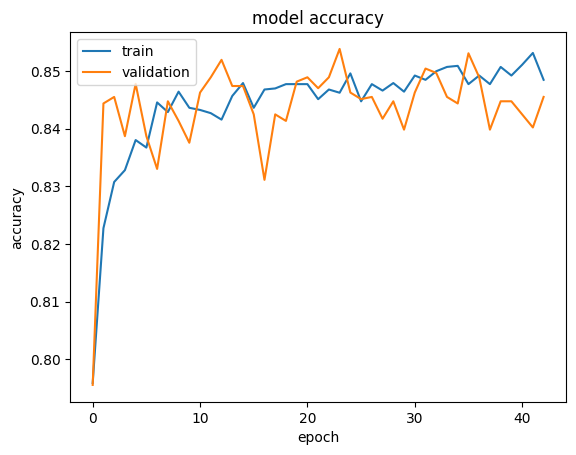

In [50]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

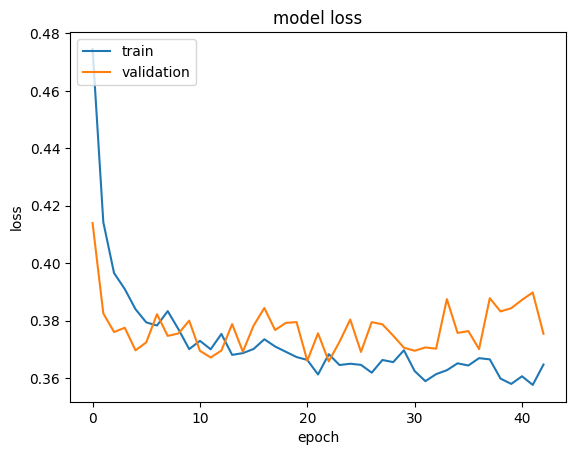

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Prediction for test data**

In [33]:
#predicting using test set
y_pred = classifier.predict(X_test)
y_pred = y_pred >=0.5

63/63 [==============================] - 0s 2ms/step


In [34]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1559,   36],
       [ 255,  150]])

In [36]:
#Claculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8545

In [37]:
#Getting the weights
classifier.get_weights()

[array([[-0.4416641 , -0.29108796, -1.4300978 , -0.95077646,  1.5799316 ,
          0.87502766,  1.3432395 , -0.3663773 , -0.6928444 , -0.23690553,
          0.52036387],
        [ 0.64164346, -0.11450452, -5.9935617 ,  3.9705076 , -2.2979853 ,
          3.2962136 , -2.9636605 ,  3.9252844 ,  3.1750436 , -2.2372417 ,
         -2.544024  ],
        [ 0.59241736,  0.32635888,  0.11780688, -2.1680799 ,  0.62111354,
          1.6448245 , -0.28817606,  0.20118989,  0.3872015 , -0.34668016,
          2.8308275 ],
        [-5.037709  ,  1.0508235 ,  0.6258313 ,  1.4937848 ,  3.9683187 ,
          1.3654794 , -1.9651352 , -0.5821134 ,  1.9809853 , -2.6746407 ,
         -4.045955  ],
        [-6.4178247 ,  4.6796637 ,  0.2023359 , -2.4195805 , -1.956912  ,
          3.151637  ,  2.064587  , -0.7142014 , -0.5480111 , -1.5718404 ,
         -2.166981  ],
        [-0.06093801, -0.6239649 , -0.6771764 ,  0.21842213,  1.6777862 ,
         -1.3068248 ,  2.5654676 , -0.17478663,  0.08774095, -0.2382328